In [2]:

#importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Step 1: Loading the dataset
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")

# Step 2: Checking for null values
print("Red Wine Dataset - Null values:\n", red_wine_data.isnull().sum())
print("\nWhite Wine Dataset - Null values:\n", white_wine_data.isnull().sum())
#there are  no null values in the dataset

Red Wine Dataset - Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White Wine Dataset - Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:

X_red = red_wine_data.drop(columns=['quality'])
y_red = red_wine_data['quality']

X_white = white_wine_data.drop(columns=['quality'])
y_white = white_wine_data['quality']

In [5]:

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Dimensionality Reduction using PCA
scaler = StandardScaler()

In [6]:
X_red_train_scaled = scaler.fit_transform(X_red_train)
X_white_train_scaled = scaler.fit_transform(X_white_train)

pca_red = PCA(n_components=2)
X_red_train_pca = pca_red.fit_transform(X_red_train_scaled)

pca_white = PCA(n_components=2)
X_white_train_pca = pca_white.fit_transform(X_white_train_scaled)

In [7]:
# Dimensionality Reduction using LDA
lda_red = LDA(n_components=2)
X_red_train_lda = lda_red.fit_transform(X_red_train_scaled, y_red_train)

lda_white = LDA(n_components=2)
X_white_train_lda = lda_white.fit_transform(X_white_train_scaled, y_white_train)

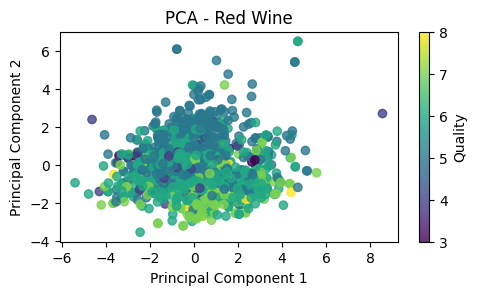

In [8]:
#  Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(X_red_train_pca[:, 0], X_red_train_pca[:, 1], c=y_red_train, cmap='viridis', alpha=0.8)
plt.title('PCA - Red Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality')

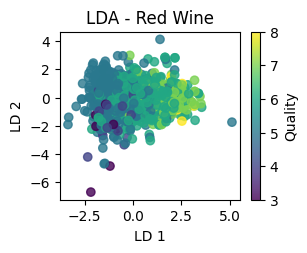

In [9]:

plt.subplot(2, 2, 2)
plt.scatter(X_red_train_lda[:, 0], X_red_train_lda[:, 1], c=y_red_train, cmap='viridis', alpha=0.8)
plt.title('LDA - Red Wine')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.colorbar(label='Quality')

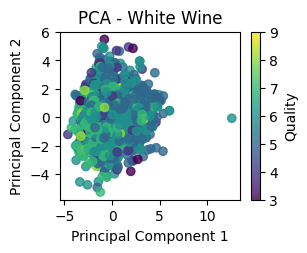

In [10]:
plt.subplot(2, 2, 3)
plt.scatter(X_white_train_pca[:, 0], X_white_train_pca[:, 1], c=y_white_train, cmap='viridis', alpha=0.8)
plt.title('PCA - White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality')

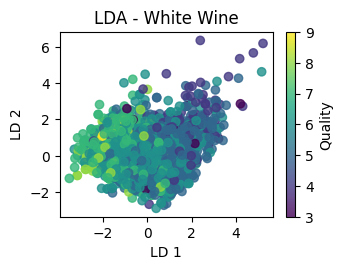

In [11]:
plt.subplot(2, 2, 4)
plt.scatter(X_white_train_lda[:, 0], X_white_train_lda[:, 1], c=y_white_train, cmap='viridis', alpha=0.8)
plt.title('LDA - White Wine')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.colorbar(label='Quality')

plt.tight_layout()
plt.show()
     

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, roc_curve, auc

In [13]:

rf_red_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_red_lda = RandomForestRegressor(n_estimators=100, random_state=42)

rf_white_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_white_lda = RandomForestRegressor(n_estimators=100, random_state=42)

rf_red_pca.fit(X_red_train_pca, y_red_train)
rf_red_lda.fit(X_red_train_lda, y_red_train)
rf_white_pca.fit(X_white_train_pca, y_white_train)
rf_white_lda.fit(X_white_train_lda, y_white_train)

# Test the models
y_red_pred_pca = rf_red_pca.predict(pca_red.transform(X_red_test))
y_red_pred_lda = rf_red_lda.predict(lda_red.transform(X_red_test))
y_white_pred_pca = rf_white_pca.predict(pca_white.transform(X_white_test))
y_white_pred_lda = rf_white_lda.predict(lda_white.transform(X_white_test))

# Measure the performance of the trained models
mse_red_pca = mean_squared_error(y_red_test, y_red_pred_pca)
mse_red_lda = mean_squared_error(y_red_test, y_red_pred_lda)
mse_white_pca = mean_squared_error(y_white_test, y_white_pred_pca)
mse_white_lda = mean_squared_error(y_white_test, y_white_pred_lda)

print("Red Wine - PCA MSE:", mse_red_pca)
print("Red Wine - LDA MSE:", mse_red_lda)
print("White Wine - PCA MSE:", mse_white_pca)
print("White Wine - LDA MSE:", mse_white_lda)

Red Wine - PCA MSE: 0.7066824999999999
Red Wine - LDA MSE: 0.8774834375000001
White Wine - PCA MSE: 5.033914795918367
White Wine - LDA MSE: 2.487097346938775


C:\Users\Ashwanth GP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\Ashwanth GP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
C:\Users\Ashwanth GP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\Ashwanth GP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

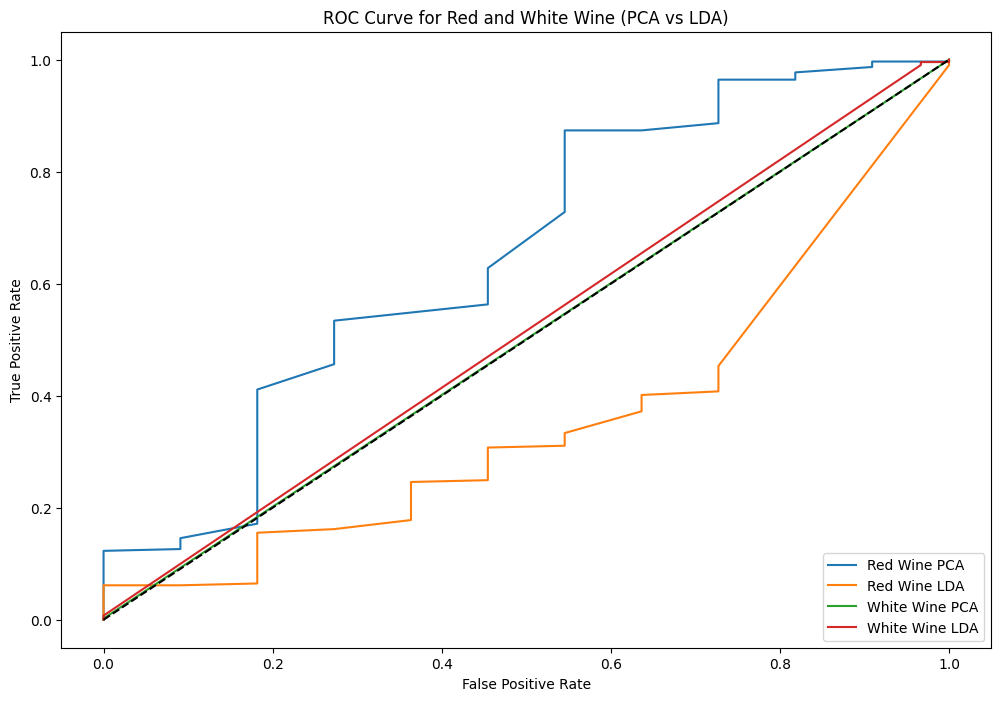

In [14]:
# Calculate ROC curves for each class
threshold = 5  # Threshold to classify as low quality (0) or high quality (1)

fpr_red_pca, tpr_red_pca, _ = roc_curve(y_red_test >= threshold, y_red_pred_pca)
fpr_red_lda, tpr_red_lda, _ = roc_curve(y_red_test >= threshold, y_red_pred_lda)
fpr_white_pca, tpr_white_pca, _ = roc_curve(y_white_test >= threshold, y_white_pred_pca)
fpr_white_lda, tpr_white_lda, _ = roc_curve(y_white_test >= threshold, y_white_pred_lda)

# Plot ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_red_pca, tpr_red_pca, label='Red Wine PCA')
plt.plot(fpr_red_lda, tpr_red_lda, label='Red Wine LDA')
plt.plot(fpr_white_pca, tpr_white_pca, label='White Wine PCA')
plt.plot(fpr_white_lda, tpr_white_lda, label='White Wine LDA')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Red and White Wine (PCA vs LDA)')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate additional performance metrics
y_red_pred_pca_binary = (y_red_pred_pca >= threshold).astype(int)
y_red_pred_lda_binary = (y_red_pred_lda >= threshold).astype(int)
y_white_pred_pca_binary = (y_white_pred_pca >= threshold).astype(int)
y_white_pred_lda_binary = (y_white_pred_lda >= threshold).astype(int)

accuracy_red_pca = accuracy_score(y_red_test >= threshold, y_red_pred_pca_binary)
accuracy_red_lda = accuracy_score(y_red_test >= threshold, y_red_pred_lda_binary)
accuracy_white_pca = accuracy_score(y_white_test >= threshold, y_white_pred_pca_binary)
accuracy_white_lda = accuracy_score(y_white_test >= threshold, y_white_pred_lda_binary)

precision_red_pca = precision_score(y_red_test >= threshold, y_red_pred_pca_binary)
precision_red_lda = precision_score(y_red_test >= threshold, y_red_pred_lda_binary)
precision_white_pca = precision_score(y_white_test >= threshold, y_white_pred_pca_binary)
precision_white_lda = precision_score(y_white_test >= threshold, y_white_pred_lda_binary)

recall_red_pca = recall_score(y_red_test >= threshold, y_red_pred_pca_binary)
recall_red_lda = recall_score(y_red_test >= threshold, y_red_pred_lda_binary)
recall_white_pca = recall_score(y_white_test >= threshold, y_white_pred_pca_binary)
recall_white_lda = recall_score(y_white_test >= threshold, y_white_pred_lda_binary)

f1_red_pca = f1_score(y_red_test >= threshold, y_red_pred_pca_binary)
f1_red_lda = f1_score(y_red_test >= threshold, y_red_pred_lda_binary)
f1_white_pca = f1_score(y_white_test >= threshold, y_white_pred_pca_binary)
f1_white_lda = f1_score(y_white_test >= threshold, y_white_pred_lda_binary)
print("Red Wine - PCA:")
print("  Accuracy:", accuracy_red_pca)
print("  Precision:", precision_red_pca)
print("  Recall:", recall_red_pca)
print("  F1 Score:", f1_red_pca)

print("\nRed Wine - LDA:")
print("  Accuracy:", accuracy_red_lda)
print("  Precision:", precision_red_lda)
print("  Recall:", recall_red_lda)
print("  F1 Score:", f1_red_lda)

print("\nWhite Wine - PCA:")
print("  Accuracy:", accuracy_white_pca)
print("  Precision:", precision_white_pca)
print("  Recall:", recall_white_pca)
print("  F1 Score:", f1_white_pca)

print("\nWhite Wine - LDA:")
print("  Accuracy:", accuracy_white_lda)
print("  Precision:", precision_white_lda)
print("  Recall:", recall_white_lda)
print("  F1 Score:", f1_white_lda)


Red Wine - PCA:
  Accuracy: 0.965625
  Precision: 0.9685534591194969
  Recall: 0.9967637540453075
  F1 Score: 0.9824561403508771

Red Wine - LDA:
  Accuracy: 0.9625
  Precision: 0.9655172413793104
  Recall: 0.9967637540453075
  F1 Score: 0.9808917197452229

White Wine - PCA:
  Accuracy: 0.03163265306122449
  Precision: 1.0
  Recall: 0.0010526315789473684
  F1 Score: 0.002103049421661409

White Wine - LDA:
  Accuracy: 0.9683673469387755
  Precision: 0.9693564862104188
  Recall: 0.9989473684210526
  F1 Score: 0.9839294971487818
